<a href="https://colab.research.google.com/github/DSGP-Group-1-EAPS/SL-Apparel-Dataset/blob/Kavindu-Deshanjana/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing nesassary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from google.colab import drive
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error, explained_variance_score


### Data Preprocessing

In [10]:
# Mounting the Google Drive
drive.mount('/content/drive')

# Reading the preprocessed data from the specified location
data = pd.read_excel('/content/drive/MyDrive/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/preprocessed_data_new.xlsx')

def onehot_encode(df, column, prefix):
    df = df.copy()

    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)

    return df


def preprocess_inputs(df):
    df = df.copy()

    # Drop ID columns
    df = df.drop('Date', axis=1)
    df = df.drop('Code', axis=1)
    df = df.drop('Shift', axis=1)
    df = df.drop('Department', axis=1)
    df = df.drop('Absenteeism Type', axis=1)
    df = df.drop('Status', axis=1)
    df = df.drop('Leave Type', axis=1)
    df = df.drop('Absent/Present', axis=1)
    df = df.drop('Reason', axis=1)
    df = df.drop('Joined Date', axis=1)
    df = df.drop('TargetCategory', axis=1)
    df = df.drop('TookLeaveNextMonth', axis=1)
    # One-hot encode the reason column
    df = onehot_encode(
        df,
        column='Encoded Reason',
        prefix='Reason'
    )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Training the Model


[0]	validation_0-rmse:9.59541	validation_1-rmse:5.89505


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[100]	validation_0-rmse:7.47093	validation_1-rmse:5.37328
[113]	validation_0-rmse:7.36684	validation_1-rmse:5.40688


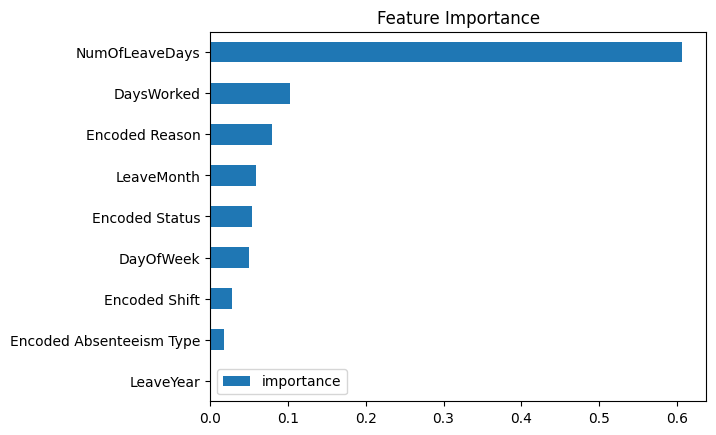

Root Mean Squared Error: 5.30
Employees' IDs predicted to be absent next month with predicted number of days (rounded up):
         Code  PredictedAbsentDays  Actual
27747  AA3785                  7.0       1
27748  AA2316                  7.0       0
27749  AA2585                  7.0       0
27750   AA594                  7.0       0
27751  AA1465                  7.0       1
...       ...                  ...     ...
40661  AA2212                  2.0       0
40662   AA723                  2.0       0
40663  AA1280                  2.0       0
40664  AA1964                  2.0       0
40665    AA12                  2.0       0

[12919 rows x 3 columns]
Mean Absolute Error: 3.35
R-squared (R2): 0.08
Mean Squared Logarithmic Error (MSLE): 1.18062
Explained Variance Score: 0.08
Accuracy: 4.67%


In [5]:

# Define features and target variable
features = ['Encoded Reason', 'Encoded Status', 'Encoded Absenteeism Type', 'Encoded Shift', 'DaysWorked', 'DayOfWeek', 'LeaveMonth', 'LeaveYear', 'NumOfLeaveDays']
target = 'LeavesNextMonth'

# Split data into training and testing sets
train = df[df['Date'] <= '2022-12-31']
test = df[df['Date'] > '2022-12-31']

# Define features and target variables for training and testing
X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

# Train the XGBoost regression model
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                        n_estimators=1000,
                        early_stopping_rounds=50,
                        max_depth=3,
                        learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='rmse',
        verbose=100)

# Plot feature importance
fi = pd.DataFrame(data=reg.feature_importances_,
                  index=features,
                  columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# Make predictions on the test set
predictions = reg.predict(X_test)

# Round up predicted days to nearest whole number
predictions_rounded = np.ceil(predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse:.2f}')

# Employees predicted to be absent next month with predicted number of days
predicted_absentees = pd.DataFrame({'Code': test['Code'], 'PredictedAbsentDays': predictions_rounded, 'Actual': test['LeavesNextMonth']})
print("Employees' IDs predicted to be absent next month with predicted number of days (rounded up):")
print(predicted_absentees)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae:.2f}')

# Calculate R-squared (R2)
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2): {r2:.2f}')

# Calculate Mean Squared Logarithmic Error (MSLE)
msle = mean_squared_log_error(y_test, predictions)
print(f'Mean Squared Logarithmic Error (MSLE): {msle:.5f}')

# Calculate Explained Variance Score
explained_variance = explained_variance_score(y_test, predictions)
print(f'Explained Variance Score: {explained_variance:.2f}')


# Importing accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(test['LeavesNextMonth'], predictions_rounded)
print(f'Accuracy: {accuracy * 100:.2f}%')


TypeError: cannot unpack non-iterable NoneType object

Ranidus code

ModuleNotFoundError: No module named 'catboost'

In [18]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error, explained_variance_score

# Mounting the Google Drive
drive.mount('/content/drive')

# Load the preprocessed data
data = pd.read_excel('/content/drive/MyDrive/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/preprocessed_data_new.xlsx')

def onehot_encode(df, column, prefix):
    df = df.copy()

    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)

    return df

def preprocess_inputs(df):
    df = df.copy()

    # Drop unnecessary columns
    columns_to_drop = ['Date', 'Code', 'Shift', 'Department', 'Absenteeism Type', 'Status', 'Leave Type',
                       'Absent/Present', 'Reason', 'Joined Date', 'TargetCategory', 'TookLeaveNextMonth']
    df = df.drop(columns_to_drop, axis=1)

    # One-hot encode the reason column
    df = onehot_encode(df, column='Encoded Reason', prefix='Reason')

    # Split df into X and y
    y = df['LeavesNextMonth'].copy()
    X = df.drop('LeavesNextMonth', axis=1)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

    return X_train, X_test, y_train, y_test

# Preprocess data
data = data[data['Date'] < '2023-12-01']
X_train, X_test, y_train, y_test = preprocess_inputs(data)

# Train the XGBoost regression model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = xgb_model.predict(X_test)

# Define a function to map predicted values to classes
def map_to_class(value):
    if value is None:
        return 'Unknown'
    elif value >= 2:
        return 'B'
    else:
        return 'A'

# Map predicted values to classes
predicted_classes = [map_to_class(value) for value in predictions]

# Calculate R-squared (R2)
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2): {r2:.2f}')

# Make predictions on the test data
predictions_rf = xgb_model.predict(X_test)
actual_classes = [map_to_class(value) for value in y_test]

# Map predicted values to classes
predicted_classes_rf = [map_to_class(value) for value in predictions_rf]
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_rf})
# Create a DataFrame to display actual and predicted values
results_classified_df = pd.DataFrame({'Actual': actual_classes, 'Predicted': predicted_classes_rf})

# Calculate accuracy
accuracy_rf = accuracy_score(actual_classes, predicted_classes_rf)

# Map predicted values to classes
predicted_classes_rf = [map_to_class(value) for value in predictions_rf if value is not None]
actual_classes_filtered = [actual for idx, actual in enumerate(actual_classes) if predictions_rf[idx] is not None]

# Calculate accuracy
accuracy_rf = accuracy_score(actual_classes_filtered, predicted_classes_rf)


print("Actual values and predictions:")
print(results_df)
print("\n\nAccuracy of Predicted Classes (XGBoost):", accuracy_rf)

# Display the DataFrame
print(results_classified_df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
R-squared (R2): 0.56
Actual values and predictions:
       Actual  Predicted
29176       0   1.509778
15446       1   5.726143
28579       0   0.969079
27999       0   1.434221
3763        0   2.794360
...       ...        ...
36030      16   4.634670
9579        0   4.342109
6868        1   6.416487
30861       7   2.617118
849         1   6.177671

[7949 rows x 2 columns]


Accuracy of Predicted Classes (XGBoost): 0.6672537426091332
     Actual Predicted
0         A         A
1         A         B
2         A         A
3         A         A
4         A         B
...     ...       ...
7944      B         B
7945      A         B
7946      A         B
7947      B         B
7948      A         B

[7949 rows x 2 columns]
